In [71]:
import cv2
import numpy as np
import glob
from skimage.util import img_as_float

from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [66]:
ban8 = cv2.imread('data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-B08-2019-05-11.png')
ban4 = cv2.imread('data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-B04-2019-05-11.png')

In [81]:
band8_files = glob.glob('data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-B08*.png')
band4_files = glob.glob('data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-B04*.png')
band8_files.sort()
band4_files.sort()

In [90]:
ndvi_mean=[]
dates= []
for band4_file,band8_file in zip(band4_files, band8_files):
    dates.append(band4_file[-14:-4])
    
    band4 = cv2.imread(band4_file)
    band8 = cv2.imread(band8_file)
    
    ndvi = (band8.astype(float) - band4.astype(float))/(band8.astype(float)+band4.astype(float))

    image = img_as_float(ndvi)
    image = image[:, :, ::-1]
    
    ndvi_mean.append(ndvi.mean())

#     plt.imshow(image,cmap='RdYlGn')

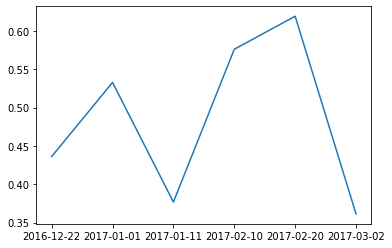

In [96]:
plt.plot(dates[:6], ndvi_mean[:6])

In [57]:
ndvi.sum()

596181.2072298473

In [ ]:
cv2.imwrite('E:\DataSets\man_ndvi.png',ndvi)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


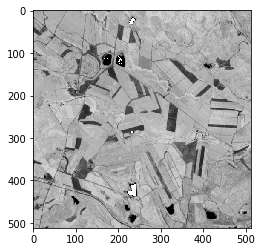

In [21]:
from PIL import Image
# img = Image.open('E:\DataSets\man_ndvi.png')
# img.save('E:\DataSets\image.tiff')
plt.imshow(ndvi)